<a href="https://colab.research.google.com/github/redaouazzani23/ML/blob/main/CustomerChurn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/SDAI/Telco_customer_churn.xlsx')

In [ ]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [ ]:
df.drop(['Churn Label','Churn Score', 'CLTV', 'Churn Reason'], axis= 1, inplace=True)
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1


In [ ]:
df['Churn Value'].unique()

array([1, 0])

In [ ]:
df.drop(['Country', 'Count', 'State', 'CustomerID', 'Lat Long'], axis=1, inplace=True)
df.head()

,City,Zip Code,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
0,Los Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,Los Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,Los Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
3,Los Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,Los Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1


In [ ]:
#we want to check how many rows are missing data

len(df.loc[df['Total Charges']==' '])

11

In [ ]:
# We replace all empty total charges by the value 0
df.loc[(df['Total Charges']== ' '), 'Total Charges'] = 0

In [ ]:
df.loc[df['Tenure Months'] == 0]

,City,Zip Code,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
2234,San Bernardino,92408,34.084909,-117.258107,Female,No,Yes,No,0,No,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0,0
2438,Independence,93526,36.869584,-118.189241,Male,No,No,No,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0,0
2568,San Mateo,94401,37.590421,-122.306467,Female,No,Yes,No,0,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0,0
2667,Cupertino,95014,37.306612,-122.080621,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0,0
2856,Redcrest,95569,40.363446,-123.835041,Female,No,Yes,No,0,No,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0,0
4331,Los Angeles,90029,34.089953,-118.294824,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,0,0
4687,Sun City,92585,33.739412,-117.173334,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0,0
5104,Ben Lomond,95005,37.078873,-122.090386,Female,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0,0
5719,La Verne,91750,34.144703,-117.770299,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0,0
6772,Bell,90201,33.970343,-118.171368,Female,No,Yes,Yes,0,Yes,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,0,0


In [ ]:
# We want to replace all blank spaeces in column names by an underscore
df.columns = df.columns.str.replace(' ', '_')

In [ ]:
#We want to replace blank spaces in the name of the cities by an underscore
df['City'].replace(' ', '_', regex= True, inplace= True)

## FORMAT THE DATA: SPLIT INDEPENDENT AND DEPENDENT VARIABLES

In [ ]:
#We want to create the Train Data which is all columns except from the one named CHURN VALUE

X = df.drop(['Churn_Value'], axis = 1).copy()
X.head()

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges
0,Los_Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
1,Los_Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65
2,Los_Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5
3,Los_Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05
4,Los_Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3


In [ ]:
y = df['Churn_Value']

## One hot encoding variables

In [ ]:
''' We have many categorical variables. We need to one-hot encode them to be able to carry out XGBoost. There are two main methods to do that. ColumnTransfer() of scikit-learn and GetDummies() of pandas.
We will use getdummies() of pandas.
'''

' We have many categorical variables. We need to one-hot encode them to be able to carry out XGBoost. There are two main methods to do that. ColumnTransfer() of scikit-learn and GetDummies() of pandas. \nWe will use getdummies() of pandas.\n'

In [ ]:
data_example = pd.get_dummies(X, columns =['Payment_Method'])
#data_example.head()

In [ ]:
X_encoded = pd.get_dummies(X, columns= ['City', 'Gender', 'Senior_Citizen', 'Partner',
                                        'Dependents','Phone_Service', 'Multiple_Lines',
                                        'Internet_Service', 'Online_Security', 'Online_Backup',
                                        'Device_Protection', 'Tech_Support', 'Streaming_TV', 'Streaming_Movies',
                                        'Contract', 'Paperless_Billing', 'Payment_Method'])
X_encoded.head()

,Zip_Code,Latitude,Longitude,Tenure_Months,Monthly_Charges,Total_Charges,City_Acampo,City_Acton,City_Adelanto,City_Adin,...,Streaming_Movies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,Paperless_Billing_No,Paperless_Billing_Yes,Payment_Method_Bank transfer (automatic),Payment_Method_Credit card (automatic),Payment_Method_Electronic check,Payment_Method_Mailed check
0,90003,33.964131,-118.272783,2,53.85,108.15,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
1,90005,34.059281,-118.307420,2,70.70,151.65,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,90006,34.048013,-118.293953,8,99.65,820.5,0,0,0,0,...,1,1,0,0,0,1,0,0,1,0
3,90010,34.062125,-118.315709,28,104.80,3046.05,0,0,0,0,...,1,1,0,0,0,1,0,0,1,0
4,90015,34.039224,-118.266293,49,103.70,5036.3,0,0,0,0,...,1,1,0,0,0,1,1,0,0,0


In [ ]:
X_encoded['Total_Charges'] = pd.to_numeric(X_encoded['Total_Charges'])
X_encoded.dtypes.unique()

array([dtype('int64'), dtype('float64'), dtype('uint8')], dtype=object)

## BUILD A PRELIMINARY XGBOOST MODEL

In [ ]:
''' First of all, we will see how much imbalanced our data is. Since people who churned are encoded in the Chur
Value column as 1 then we can compute that by divind the sum of these column by its length.
'''
sum(y)/len(y)
# 27% of people have churned. It is quiet imbalanced so we need to pay attention with the split we do of our training and test data sets.



0.2653698707936959

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state= 42, stratify= y)

We can see that stratify did well its job. The same proportion of churners is in the X_train and in X_test. The problem of balance is not a problem right now.

In [ ]:
import xgboost as xgb

clf_xgb = xgb.XGBClassifier(objective ='binary:logistic', seed = 42)
clf_xgb.fit(X_train,
            y_train,
            verbose = True,
            early_stopping_rounds= 10,
            eval_metric = 'aucpr',
            eval_set = [(X_test, y_test)])

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-aucpr:0.64036
[1]	validation_0-aucpr:0.64404
[2]	validation_0-aucpr:0.65124
[3]	validation_0-aucpr:0.65052
[4]	validation_0-aucpr:0.65321
[5]	validation_0-aucpr:0.64854
[6]	validation_0-aucpr:0.65459
[7]	validation_0-aucpr:0.65895
[8]	validation_0-aucpr:0.65746
[9]	validation_0-aucpr:0.65850
[10]	validation_0-aucpr:0.66217
[11]	validation_0-aucpr:0.66527
[12]	validation_0-aucpr:0.66322
[13]	validation_0-aucpr:0.66310
[14]	validation_0-aucpr:0.66000
[15]	validation_0-aucpr:0.66027
[16]	validation_0-aucpr:0.65781
[17]	validation_0-aucpr:0.65593
[18]	validation_0-aucpr:0.65738
[19]	validation_0-aucpr:0.65829
[20]	validation_0-aucpr:0.65683


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
#X_test.replace("null", np.nan, inplace=True)
#X_test.head()

#null_rows = X_test[X_test.isnull().any(axis=1)]
#print(null_rows)

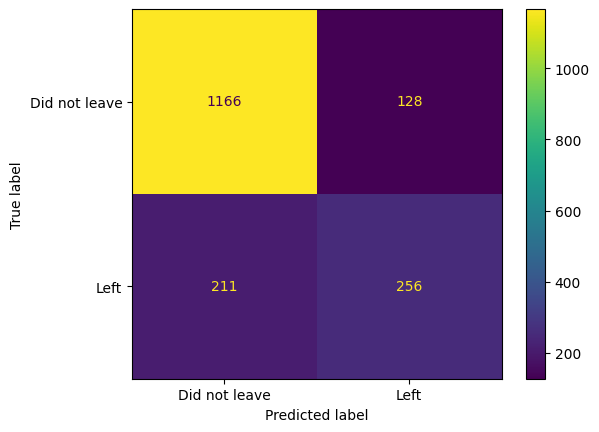

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

predictions = clf_xgb.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels =[0, 1] )
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels= ['Did not leave', 'Left'])

disp.plot()
plt.show()




In the confusion matrix, we see that of the 1294 people that did not leave, 1166 (91%) were correctly classified. And of the 467 people who left the company, 256(51%) were correctly classified. So the XGBoost model was not awesome. Part of the problem is that our data is imbalanced, which we saw earlier and we see this in the confusion matrix with the top row showing 1292 people that dint default and the bottom row showing 467 who did. We need to capture more people that left. XGboost has a parameter, scale_pos_weight, that helps with imbalanced data. So let's try to improve predictions using Cross Validation to optimize parameters

## CROSS VALIDATION

Xgboost has a lot of hyperparameters that we need to configure manually. Let's try to find the optimal values for these hyperparameters in hopes that we can improve the accuracy with testing dataset.

Note: Since we have many hyperparameters to optimize, we will use GridSearchCV(). We specify a bunch of potential values for the hyperparameters and GridSearchCV() tests all possible combinations of the parameters for us.

In [ ]:
''' When data are imblanaced the XGBOOST manual says:
If you care only about the overall performance metric ( AUC) of your prediction
    Balance the positive and negative weights via scale_pos_weigh
    Usr AUC for evaluation
    In this code, we run GridsearchCV() sequantially on subsets of parameter options, rather than all
    at once in order to optimize parameters in a short period of time.
'''
#ROUND 1:

param_grid = {
      'max_depth' : [3,4,5],
      'learning_rate' : [0.1, 0.01, 0.05],
      'gamma' : [0, 0.25, 1.0],
      'reg_lambda' :  [0, 1.0, 10.0],
      'scale_pos_weight' : [1,3,5]   #XGBOOST recommends sum(negative instances)/sum(positive instances)
    }


In [ ]:
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    seed=42,
    subsample=0.9,
    colsample_bytree=0.5
)


In [ ]:
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='roc_auc',
    verbose=2,
    n_jobs=10,
    cv=3
)


In [ ]:
grid_search.fit(X_train, y_train)


Fitting 3 folds for each of 243 candidates, totalling 729 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.5,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, m...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=10,
             param_grid={'gamma': [0, 0.25, 1.0],
                         'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': [3, 4, 5], 'reg_lambda': [0, 1.0, 10.0],
                         'scale_pos_weight': [1, 3, 5]},
             scoring='roc_auc', verbose=2)

In [ ]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(best_params)
print(best_score)

{'gamma': 1.0, 'learning_rate': 0.05, 'max_depth': 4, 'reg_lambda': 0, 'scale_pos_weight': 1}
0.8667870241847707


In [ ]:
#ROUND 2 :
param_grid = {
      'max_depth' : [4],
      'learning_rate' : [0.1, 0.5, 1],
      'gamma' : [0.25],
      'reg_lambda' :  [10, 20, 100],
      'scale_pos_weight' : [3]
 }

In [ ]:
import xgboost as xgb

clf_xgb = xgb.XGBClassifier(objective ='binary:logistic',
                            seed = 42,
                            gamma = 0.25,
                            learning_rate = 0.1,
                            max_depth = 4,
                            reg_lambda = 10,
                            scale_pos_weight = 3,
                            subsample = 0.9,
                            colsample_bytree = 0.5
                            )
clf_xgb.fit(X_train,
            y_train,
            verbose = True,
            early_stopping_rounds= 10,
            eval_metric = 'aucpr',
            eval_set = [(X_test, y_test)])

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-aucpr:0.51500
[1]	validation_0-aucpr:0.55015
[2]	validation_0-aucpr:0.59967
[3]	validation_0-aucpr:0.60767
[4]	validation_0-aucpr:0.61765
[5]	validation_0-aucpr:0.61991
[6]	validation_0-aucpr:0.62730
[7]	validation_0-aucpr:0.62586
[8]	validation_0-aucpr:0.62852
[9]	validation_0-aucpr:0.62915
[10]	validation_0-aucpr:0.63127
[11]	validation_0-aucpr:0.64769
[12]	validation_0-aucpr:0.64945
[13]	validation_0-aucpr:0.64317
[14]	validation_0-aucpr:0.64695
[15]	validation_0-aucpr:0.64711
[16]	validation_0-aucpr:0.64927
[17]	validation_0-aucpr:0.65506
[18]	validation_0-aucpr:0.64614
[19]	validation_0-aucpr:0.65473
[20]	validation_0-aucpr:0.65389
[21]	validation_0-aucpr:0.65323
[22]	validation_0-aucpr:0.65434
[23]	validation_0-aucpr:0.65568
[24]	validation_0-aucpr:0.65713
[25]	validation_0-aucpr:0.65691
[26]	validation_0-aucpr:0.65652
[27]	validation_0-aucpr:0.65461
[28]	validation_0-aucpr:0.65573
[29]	validation_0-aucpr:0.65600
[30]	validation_0-aucpr:0.65542
[31]	validation_0-

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.25, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

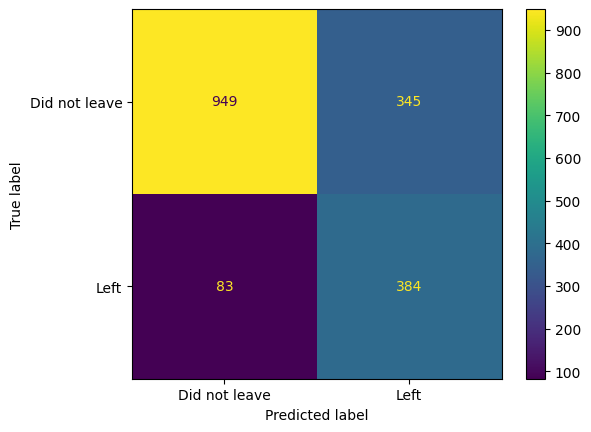

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

predictions = clf_xgb.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels =[0, 1] )
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels= ['Did not leave', 'Left'])

disp.plot()
plt.show()

In [ ]:
'''
from sklearn.model_selection import GridSearchCV
optimal_params = GridSearchCV(estimator = xgb.XGBClassifier(objective='binary: logistic',
                              seed = 42,
                              subsample = 0.9,
                              colsample_bytree = 0.5),
                              param_grid= param_grid,
                              scoring = 'roc_auc',
                              verbose = 2,
                              n_jobs = 10,
                              cv = 3 )
'''

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.5,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, m...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None,
                                     objective='binary: logistic',
                                     predictor=None, ...),
             n_jobs=10,
             param_grid={'gamma': [0, 0.25, 1.0],
                         'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': [3, 4, 5], 'reg_lambda': [0, 1.0, 10.0],
                         'scale_pos_weight': [1, 3, 5]},
             scoring='roc_auc', verbose=2)